In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10, 5)

### Un ejemplo sencillo 

La forma más sencilla de crear una figura con ejes es usando **pyplot.subplots**. Luego podemos usar **Axes.plot** para dibujar algunos datos en los ejes

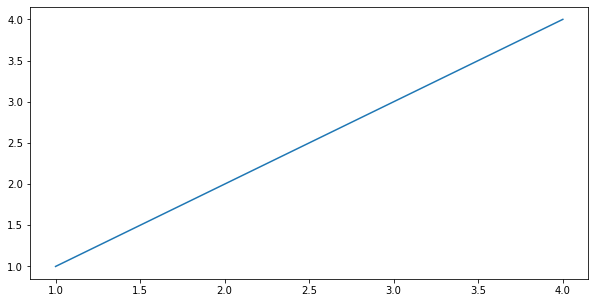

In [2]:
fig, ax = plt.subplots() # Crea una figura que contenga un solo eje.
ax.plot([1,2,3,4], [1,2,3,4]) # Trazar algunos datos en los ejes.

### 1. Figure

The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures. The easiest way to create a new Figure is with pyplot:

<Figure size 720x360 with 0 Axes>

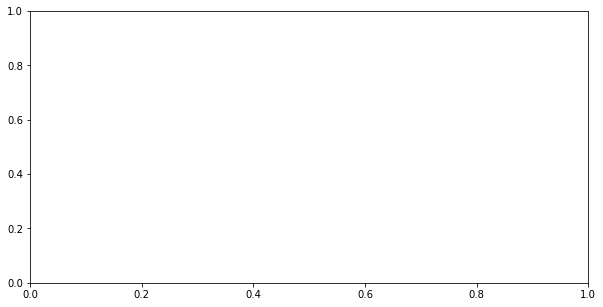

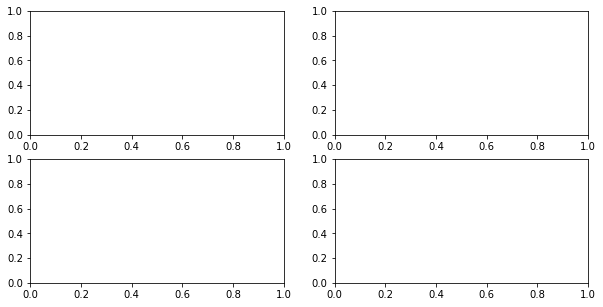

In [3]:
fig = plt.figure() # Una figura vacia sin ejes
fig, ax = plt.subplots() # Una figura con un solo eje
fig, axs = plt.subplots(2,2) # Una figura con de 2x2 con una grilla de ejes

### 2. Axes - Elementos externos de la figura - Se escriben como: "ax.funcion"

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via **set_title()**), an x-label (set via **set_xlabel()**), and a y-label set via **set_ylabel()**).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. **ax.plot()**, shown above, uses the plot method)

### 3. Axis - Elementos internos de la figura - Se escriben como: "axs.funcion"

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a **Locator** object and the **ticklabel** strings are formatted by a **Formatter**. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### 4. Artist

Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

### 5. Tipos de entradas para funciones de plotting - numpy array and pandas data frame

Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray. Most methods will also parse an addressable object like a dict, a numpy.recarray, or a pandas.DataFrame. 

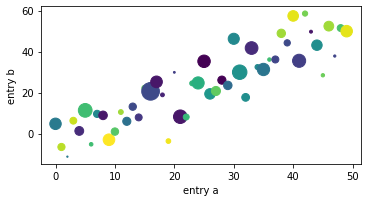

In [4]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

### 6. Formas de codificar

1. Crear explícitamente figuras y ejes, y llame a métodos en ellos (el "estilo orientado a objetos (OO)"). **En este caso utilizariamos las abreviaciones de objeto de forma directa, sin llamar a pyplot. Por ejemplo: ax.plot o ax.set_xlabel**.

2. Confiar en **pyplot** para crear y administrar implícitamente las figuras y los ejes, y use las funciones de pyplot para trazar. **Si hacemos esto, en cada parte del grafico tenemos que escribir asi: plt.plot o plt.ylabel.**

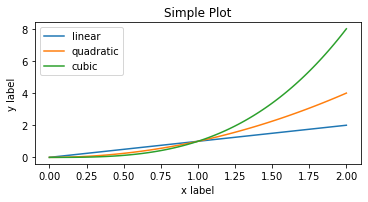

In [5]:
# Utilizando programacion Orientada a Objetos
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

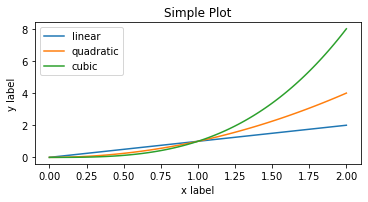

In [6]:
# Utilizando solo pyplot
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

### 7. Hacer funciones de ayuda

Si necesita hacer los mismos gráficos una y otra vez con diferentes conjuntos de datos, o desea envolver fácilmente los métodos de Matplotlib, use la función de firma recomendada a continuación.

In [7]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

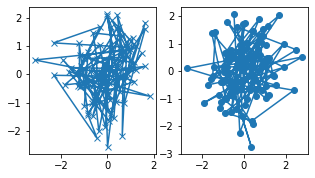

In [8]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

### 8. Estilos Artisticos

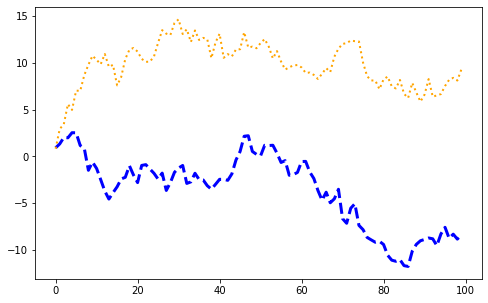

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

### 8.1 Colores

Single character shorthand notation for some basic colors.

'b' as blue

'g' as green

'r' as red

'c' as cyan

'm' as magenta

'y' as yellow

'k' as black

'w' as white

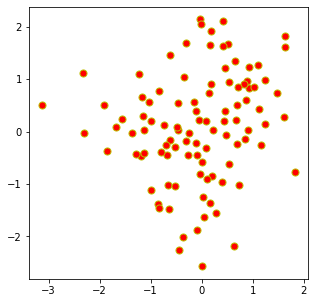

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(data1, data2, s=50, facecolor='r', edgecolor='y');

### 8.2 Anchos de línea, estilos de línea y tamaños de marcador

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the linestyles example.

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker.

Los estilos de marcadores pueden consultarse aqui: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#unfilled-markers

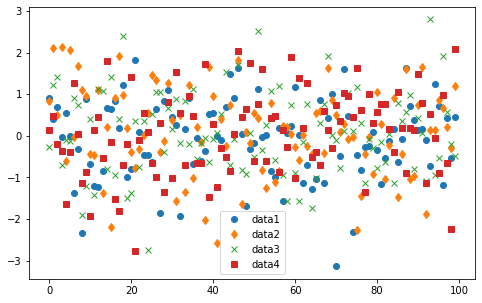

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'x', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

### 9. Etiquetar los graficos

Axes labels and text

**set_xlabel, set_ylabel, and set_title** are used to add text in the indicated locations. Text can also be directly added to plots using text

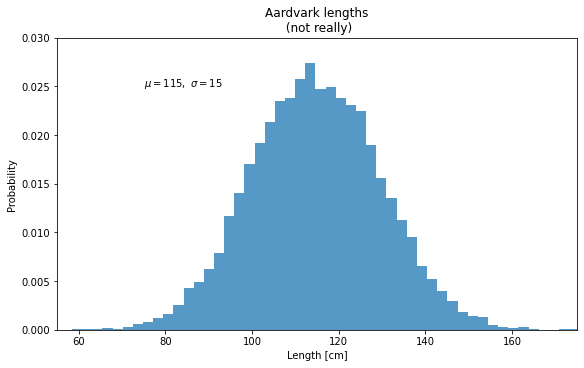

In [12]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

# Etiquetas para el titulo y los ejes
ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')

# Definir la ubicacion de un texto sobre el grafico 
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
# Definir los valores o rangos de cada eje
ax.axis([55, 175, 0, 0.03])
# Grilla
ax.grid(False);

### 10. Anotaciones - ax.annotate()

También podemos anotar puntos en un gráfico, a menudo conectando una flecha que apunta a xy, a un fragmento de texto en xytext:

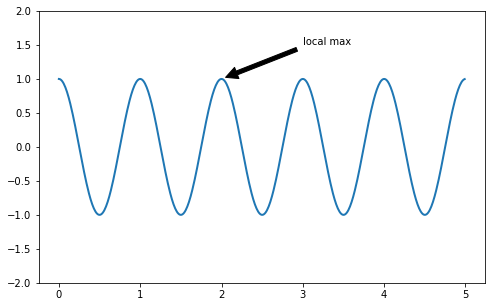

In [13]:
fig, ax = plt.subplots(figsize=(8,5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

### 11. Leyenda - ax.legend()

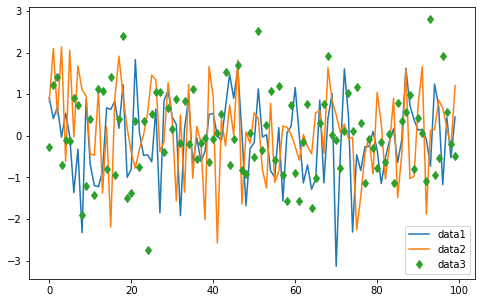

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

### 12. Axis scales and ticks

Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects

### 12.1 Escalas - set_yscale and set_xscale

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog, semilogx, and semilogy. There are a number of scales (see Scales for other examples). Here we set the scale manually

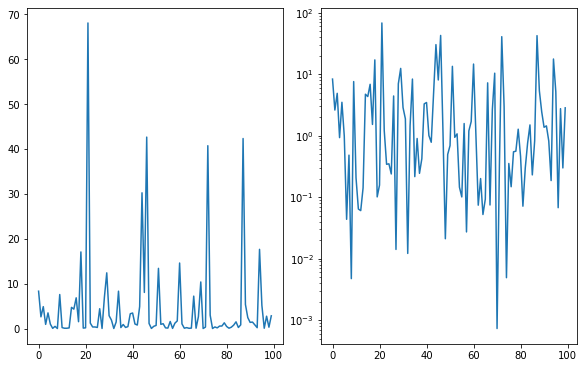

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

### 12.2 Tick locators and formatters - set_xticks()

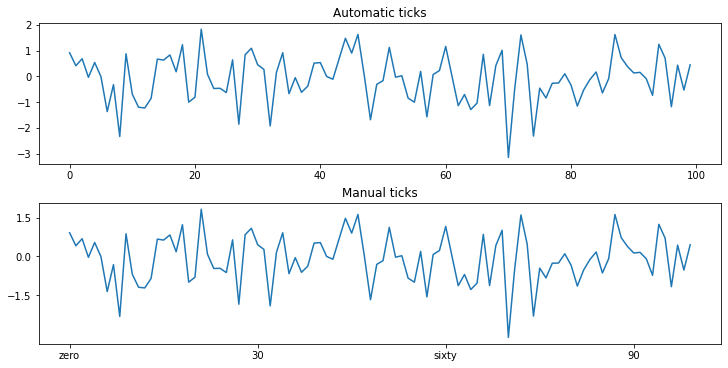

In [16]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

### 12.3 Graficando fechas y texto

Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate

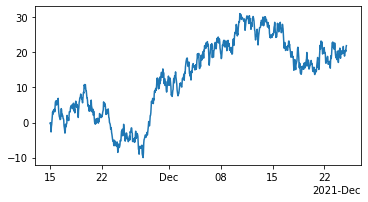

In [17]:
# Para fechas
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

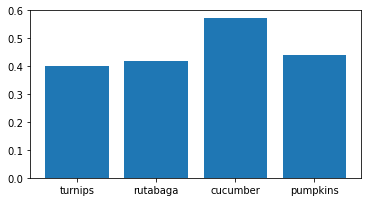

In [18]:
# Para texto, se crea una lista con las categorias
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

### 12.4 Objetos adicionales para el Axis

Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using twinx to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for twiny). See Plots with different scales for another example.

Similarly, you can add a secondary_xaxis or secondary_yaxis having a different scale than the main Axis to represent the data in different scales or units. 

Text(0.5, 0, 'Angle [°]')

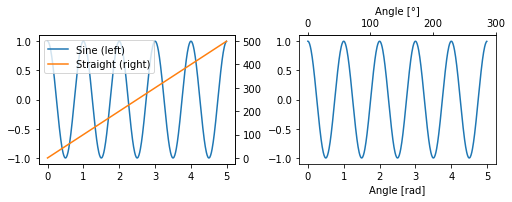

In [19]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

### 13. Color mapped data

A menudo queremos tener una tercera dimensión en una trama representada por colores en un mapa de colores. Matplotlib tiene varios tipos de gráficos que hacen esto

Text(0.5, 1.0, 'scatter()')

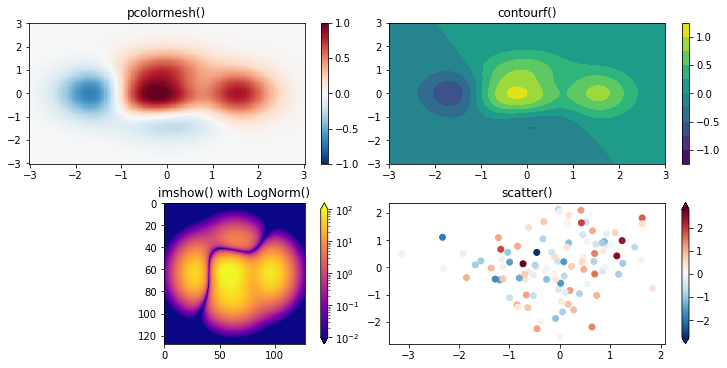

In [20]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### 14. Trabajar con multiples figuras y ejes

You can open multiple Figures with multiple calls to fig = plt.figure() or fig2, ax = plt.subplots(). By keeping the object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is plt.subplots() as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using subplot_mosaic.

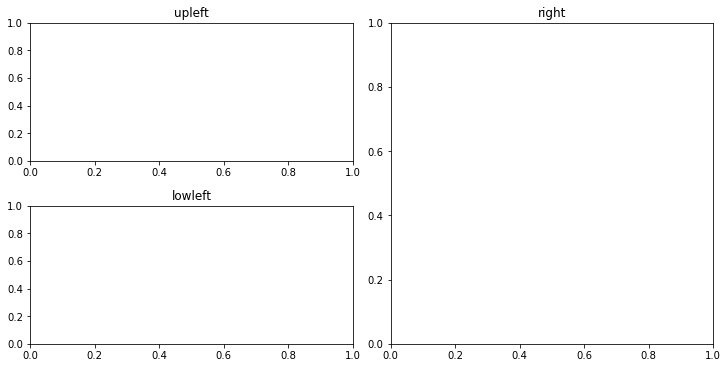

In [21]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

### 15. El ciclo de un grafico

In [22]:
# Los datos

import numpy as np
import matplotlib.pyplot as plt


data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

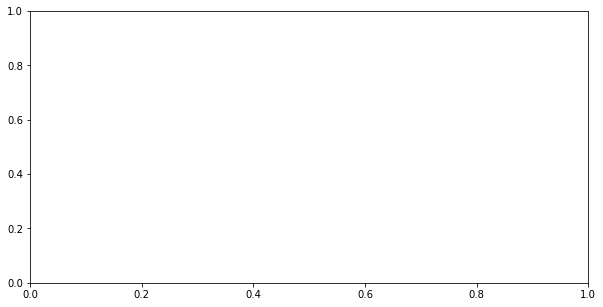

In [23]:
# Creamos la figura y el ax
fig, ax = plt.subplots()

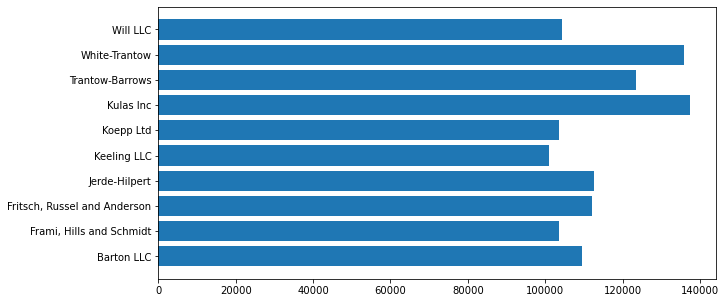

In [24]:
# Como ya tenemos definido un ax, podemos empezar a plotear
fig, ax = plt.subplots()
ax.barh(group_names, group_data);

In [25]:
# Vamos a comenzar a darle estilo
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [26]:
plt.style.use('fivethirtyeight')

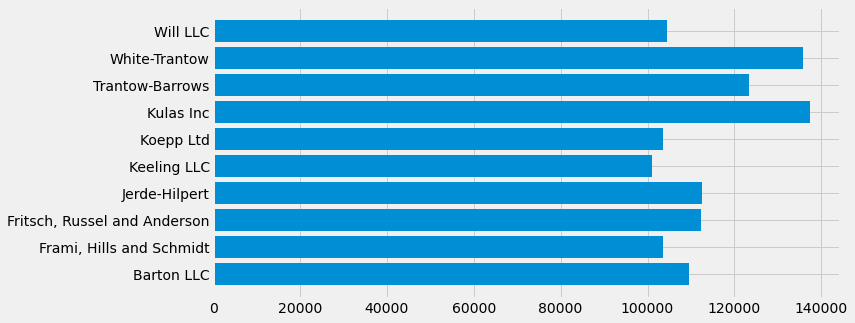

In [27]:
# Vamos hacer otra vez el grafico de arriba, pero con el estilo aplicado
fig, ax = plt.subplots()
ax.barh(group_names, group_data);

### 15.1 Customizing the plot

Primero, giremos las etiquetas en el eje x para que se vean más claramente. Podemos acceder a estas etiquetas con el método **axes.Axes.get_xticklabels()**

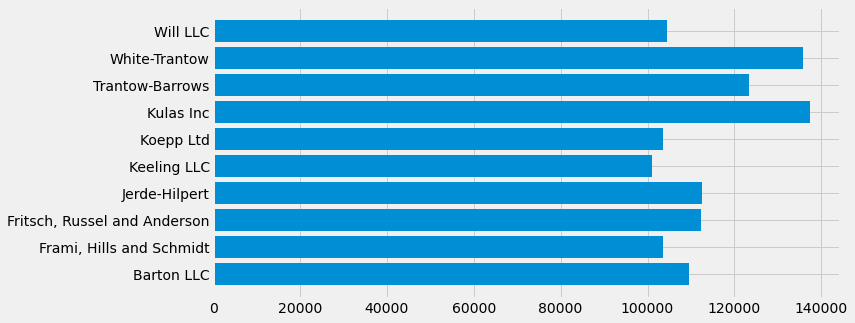

In [28]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

Si deseamos establecer la propiedad de muchos elementos a la vez, es útil usar la función **pyplot.setp()**. Esto tomará una lista (o muchas listas) de objetos Matplotlib e intentará establecer algún elemento de estilo de cada uno.

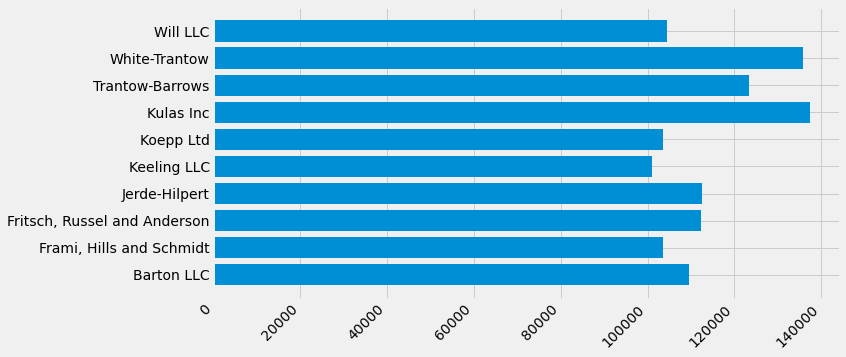

In [29]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right');

Parece que esto cortó algunas de las etiquetas en la parte inferior. Podemos decirle a Matplotlib que haga espacio automáticamente para los elementos en las figuras que creamos. Para hacer esto, establecemos el valor de **autolayout** de nuestro rcParams.

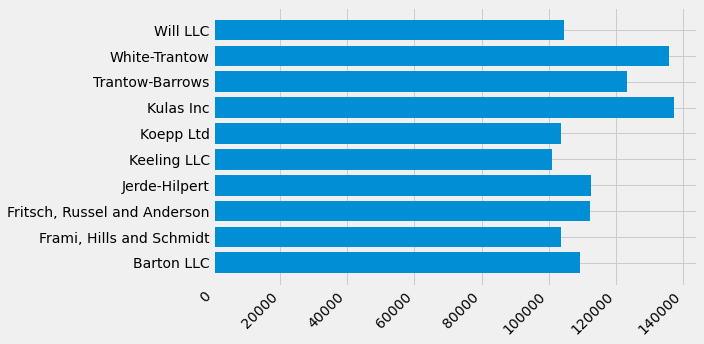

In [30]:
# Definimos los parametros para que las etiquetas no se salgan de los limites con "tightlayout"
plt.rcParams.update({'figure.autolayout':True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right');

A continuación, **agregamos etiquetas a la trama**. Para hacer esto con la interfaz OO, podemos usar el método Artist.set() para establecer las propiedades de este objeto Axes.

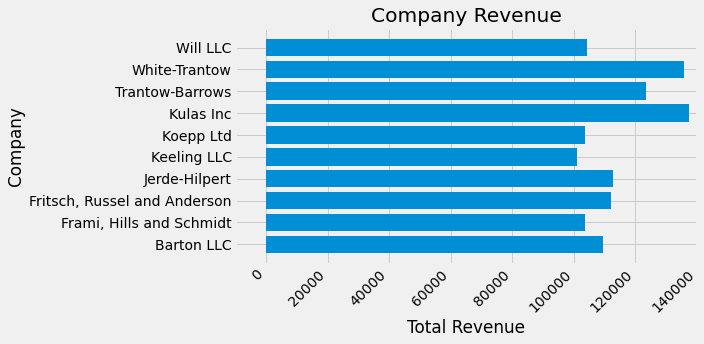

In [31]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Definimos las etiquetas, y los limites del eje x
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue');

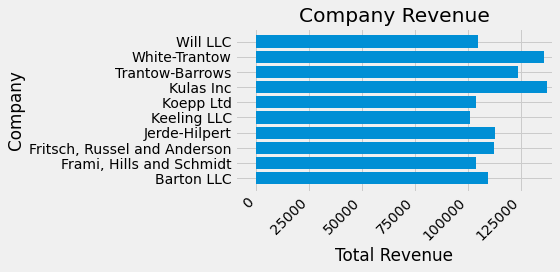

In [32]:
# Ahora vamos ajustar el tamano del grafico con la opcion "figsize"
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Definimos las etiquetas, y los limites del eje x
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue');

Para esta función, el argumento x es la etiqueta de marca original y pos es la posición de marca. Solo usaremos x aquí, pero ambos argumentos son necesarios.

In [33]:
def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

Luego podemos aplicar esta función a las etiquetas en nuestra gráfica. Para hacer esto, usamos el atributo **xaxis** de nuestros ejes. Esto le permite realizar acciones en un eje específico en nuestra trama.

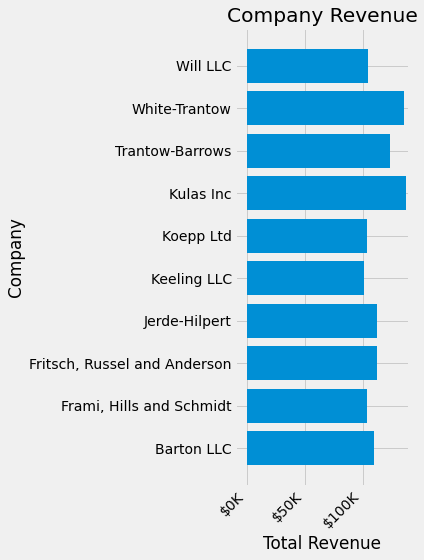

In [34]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

### 15.2 Combinar multiples visualizaciones


Es posible dibujar múltiples elementos de trazado en la misma instancia de ejes. Ejes. Para hacer esto, simplemente necesitamos llamar a otro de los métodos de trazado en ese objeto de ejes.

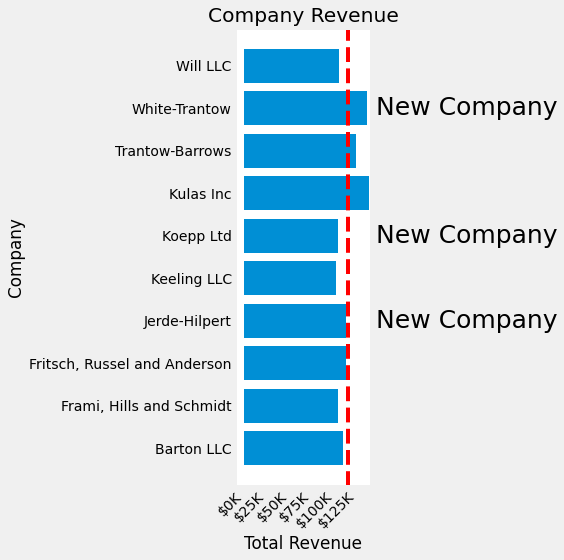

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=25,
            verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)
ax.grid(False)
ax.set_facecolor('white')

plt.show()